In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("/Users/ryandu/Desktop/MachineLearning/Stocks/Data/Huge Stock Market  Dataset/Stocks/gogl.us.csv")

In [4]:
data.keys()
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,141.94,143.84,141.20,143.18,89902,0
1,2005-02-28,143.70,147.19,139.47,143.14,124965,0
2,2005-03-01,141.79,142.57,131.36,134.50,229663,0
3,2005-03-02,135.27,139.11,135.06,137.56,88113,0
4,2005-03-03,138.59,138.59,132.24,134.89,120294,0


In [5]:
# to explicitly convert the date column to type DATETIME
# In the CSV File, there must be a Column named Data which must contain the Date Information
# THe user must speciy the Target column name also 
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
# data.pop("Unnamed: 0")
data = data.pop('Close')
data = np.array(data.to_numpy()).reshape(-1,1)

In [6]:
TARGET_INDEX=3
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data = sc.fit_transform(data)
dataset = tf.data.Dataset.from_tensor_slices((data))
dataset = dataset.window(100, shift=1,drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(100))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
x=[]
y=[]
for x_,y_ in dataset: 
    x.append(x_.numpy())
    y.append(y_.numpy())#[0][TARGET_INDEX])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [7]:
x = np.array(x)
y = np.array(y).reshape(-1,)
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,shuffle=False)

In [8]:
print(x.shape)
print(y.shape)

(3102, 99, 1)
(3102,)


In [9]:
model = keras.models.Sequential([
  keras.layers.LSTM(50,return_sequences=True),
  keras.layers.Dropout(0.25),
  keras.layers.LSTM(50,return_sequences=True),
  keras.layers.Dropout(0.35),
  keras.layers.LSTM(50,return_sequences=False),
  keras.layers.Dropout(0.25),
  keras.layers.Dense(50,activation="relu"),
  keras.layers.Dropout(0.3),
  keras.layers.Dense(1)
])
model.compile(optimizer="adam",loss='mse',metrics=['mae'])

In [10]:
model.fit(x_train,y_train,epochs=15,batch_size=32, shuffle=True, validation_split=0.1)

Epoch 1/15
66/66 [==============================] - 3s 38ms/step - loss: 0.0636 - mae: 0.1959 - val_loss: 0.0022 - val_mae: 0.0379
Epoch 2/15
66/66 [==============================] - 2s 33ms/step - loss: 0.0247 - mae: 0.1170 - val_loss: 0.0047 - val_mae: 0.0584
Epoch 3/15
66/66 [==============================] - 2s 32ms/step - loss: 0.0220 - mae: 0.1136 - val_loss: 0.0031 - val_mae: 0.0422
Epoch 4/15
66/66 [==============================] - 2s 34ms/step - loss: 0.0222 - mae: 0.1086 - val_loss: 0.0029 - val_mae: 0.0438
Epoch 5/15
66/66 [==============================] - 2s 33ms/step - loss: 0.0236 - mae: 0.1123 - val_loss: 0.0032 - val_mae: 0.0419
Epoch 6/15
66/66 [==============================] - 2s 33ms/step - loss: 0.0205 - mae: 0.1062 - val_loss: 0.0025 - val_mae: 0.0406
Epoch 7/15
53/66 [=======================>......] - ETA: 0s - loss: 0.0200 - mae: 0.1051

KeyboardInterrupt: 

In [68]:
def forecast(starting_79, leng,model):
    yy = starting_79.reshape(-1)
    print(yy.shape)
    for i in range(leng):
        tmp_pred = model.predict((np.array([yy[-99:]]).reshape(1,99,1)))
        yy = np.append(yy,tmp_pred)
    return yy[99:]

def calculate_accuracy(real, predict):
    real = np.array(real) + 1
    predict = np.array(predict) + 1
    percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))
    return percentage * 100

In [180]:
calculate_accuracy(y,yy)

94.09944430869288

(99,)


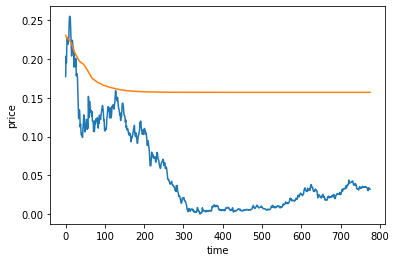

In [178]:
yy = forecast(x_test[0],len(y_test),model)
import matplotlib.pyplot as plt
plt.plot(y_test.reshape(-1))
plt.plot(yy)
plt.ylabel('price')
plt.xlabel('time')
plt.show()

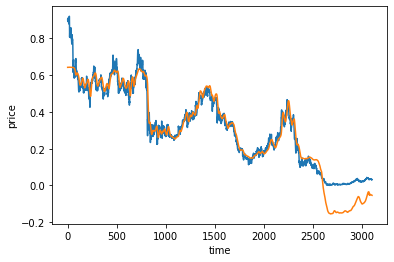

In [179]:
yy = (model.predict(x)).reshape(-1)
import matplotlib.pyplot as plt
plt.plot(y.reshape(-1))
plt.plot(yy)
plt.ylabel('price')
plt.xlabel('time')

plt.show()

In [123]:
#model2.save("/content/drive/My Drive/SequentialForecastingTSLAModel2-1.h5")